# Circle Footprint Filter Demo

A demonstration validating the PPCircleFootprint filter.

In [1]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

In [2]:
from sorcha.modules.PPApplyFOVFilter import PPCircleFootprint, PPGetSeparation

We begin by loading in a set of randomised artificial observations which were all generated to lie on the same field, within 2.1 degrees of field centre.

In [3]:
def get_sql_data(database, rows_start, nrows):
    
    con = sql.connect(database)
    observations = pd.read_sql("""SELECT observationId, observationStartMJD as observationStartMJD_TAI, visitTime, visitExposureTime, filter, seeingFwhmGeom as seeingFwhmGeom_arcsec, seeingFwhmEff as seeingFwhmEff_arcsec, fiveSigmaDepth as fieldFiveSigmaDepth_mag , fieldRA as fieldRA_deg, fieldDec as fieldDec_deg, rotSkyPos as fieldRotSkyPos_deg FROM observations order by observationId LIMIT """ + str(rows_start) + ',' + str(nrows), con)
    
    return observations

In [4]:
def get_separation(obj_RA, obj_Dec, cen_RA, cen_Dec):
    
    obj_coord = SkyCoord(ra=obj_RA, dec=obj_Dec, unit="deg")
    cen_coord = SkyCoord(ra=cen_RA, dec=cen_Dec, unit="deg")

    sep = obj_coord.separation(cen_coord)

    return sep.degree

In [5]:
db_path = "oneline_v2.0.db"
LSSTdf = get_sql_data(db_path, 0,1)

In [6]:
LSSTdf

,observationId,observationStartMJD_TAI,visitTime,visitExposureTime,filter,seeingFwhmGeom_arcsec,seeingFwhmEff_arcsec,fieldFiveSigmaDepth_mag,fieldRA_deg,fieldDec_deg,fieldRotSkyPos_deg
0,402942,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823


In [7]:
dfobs = pd.read_csv("footprintFilterValidationObservations.csv",  sep='\s+')

In [8]:
dfobs = pd.merge(dfobs, LSSTdf, left_on="FieldID", right_on="observationId", how="left")

In [9]:
dfobs

,ObjID,FieldID,fieldMJD_TAI,Range_LTC_km,RangeRate_LTC_km_s,RA_deg,RARateCosDec_deg_day,Dec_deg,DecRate_deg_day,Obj_Sun_x_LTC_km,...,observationStartMJD_TAI,visitTime,visitExposureTime,filter,seeingFwhmGeom_arcsec,seeingFwhmEff_arcsec,fieldFiveSigmaDepth_mag,fieldRA_deg,fieldDec_deg,fieldRotSkyPos_deg
0,S0000w6ca,402942.0,60945.035513,344266000.0,9.645862,273.950475,0.145419,-25.409570,-0.034414,171050400.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
1,S0000wkZa,402942.0,60945.035513,93728970.0,24.810874,273.029493,1.592210,-24.398177,-0.243588,154138100.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
2,S0000wspa,402942.0,60945.035513,330569600.0,21.915557,274.480023,0.072605,-25.283050,0.093505,172974700.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
3,S0000wUea,402942.0,60945.035513,492613400.0,25.078801,273.646543,0.109090,-25.456436,0.005462,177915900.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
4,S0000xl3a,402942.0,60945.035513,200278800.0,30.796080,271.853254,0.734379,-23.453650,-0.003425,155568800.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29051,mpc00K8271,402942.0,60945.035513,360725700.0,20.617454,272.594036,0.244908,-25.480627,0.015066,164365000.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
29052,mpc00K9056,402942.0,60945.035513,261587100.0,16.465273,272.172454,0.412457,-25.517282,0.032230,158575700.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
29053,mpc00K9551,402942.0,60945.035513,298658200.0,16.740250,274.477149,0.288844,-26.376947,0.009252,170513400.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
29054,mpc00K9617,402942.0,60945.035513,371087000.0,21.670828,272.019401,0.241333,-24.188684,0.022293,161555100.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823


We can roughly plot the distance from the field centre in RA and Dec.

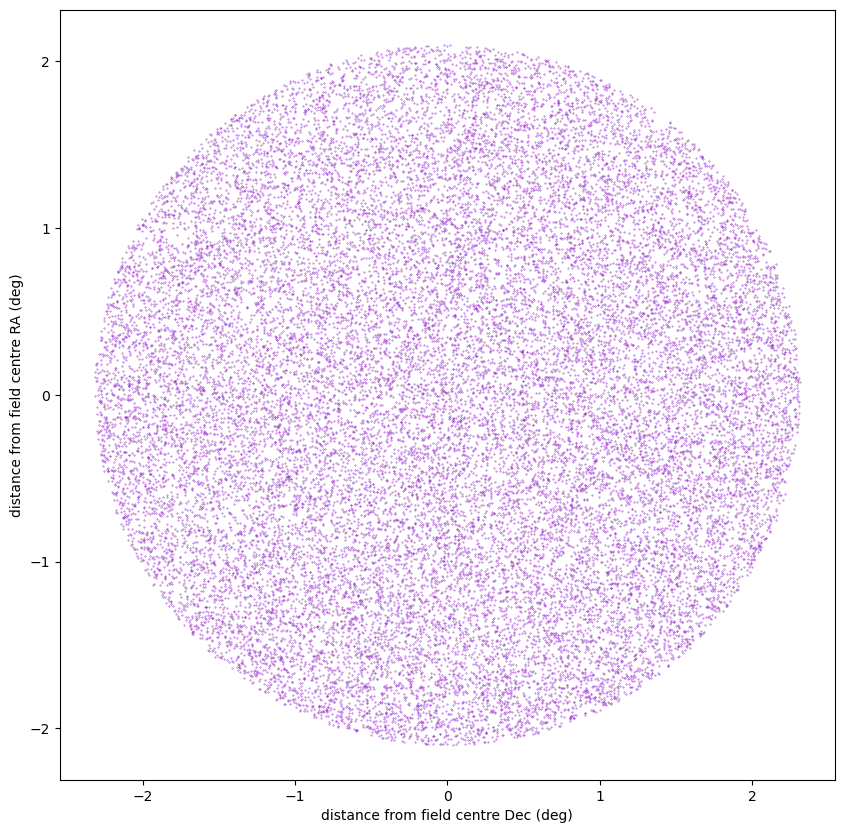

In [10]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.scatter(dfobs['fieldRA_deg']-dfobs['RA_deg'],dfobs['fieldDec_deg']-dfobs['Dec_deg'], s=0.1, color='darkorchid')
ax.set_ylabel('distance from field centre RA (deg)')
ax.set_xlabel('distance from field centre Dec (deg)')
plt.show()

As can be seen, all of these observations lie on a circle of radius 2.3 degrees. We can also plot this as a histogram.

In [11]:
object_sep = get_separation(dfobs['RA_deg'].values,
                            dfobs['Dec_deg'].values, 
                            dfobs['fieldRA_deg'].values,
                            dfobs['fieldDec_deg'].values)


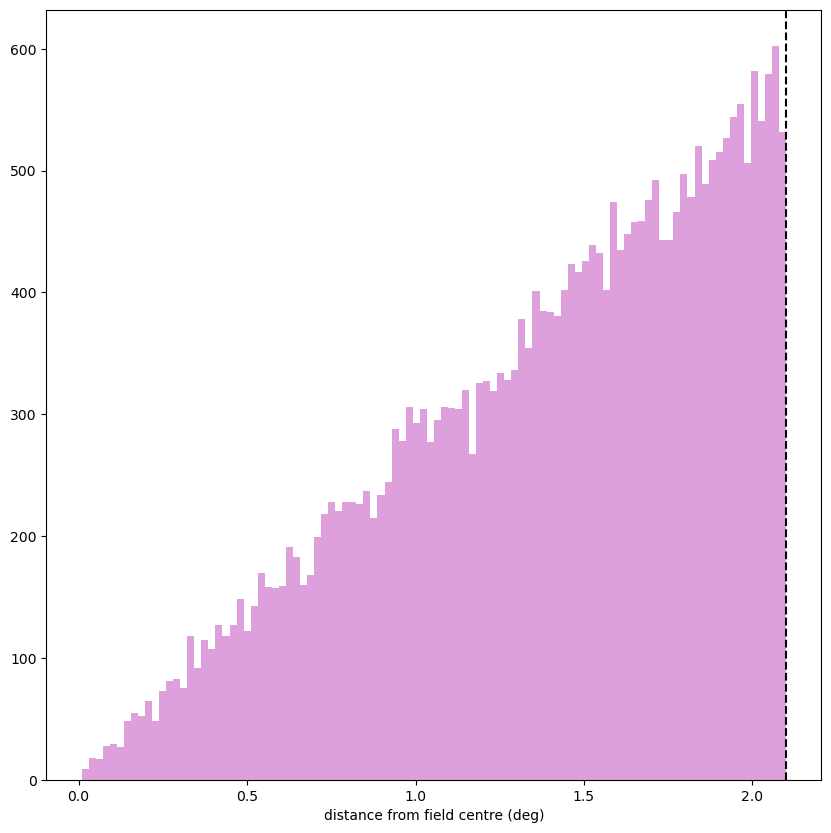

In [12]:
fig, ax = plt.subplots(1, figsize=(10,10))
_ = ax.hist(object_sep, 100, color='plum')
ax.axvline(2.1, color='black', linestyle='--')
ax.set_xlabel('distance from field centre (deg)')
plt.show()

Now we apply the circle footprint filter with a radius of 1.5 degrees.

In [13]:
obs_new = PPCircleFootprint(dfobs, 1.5)

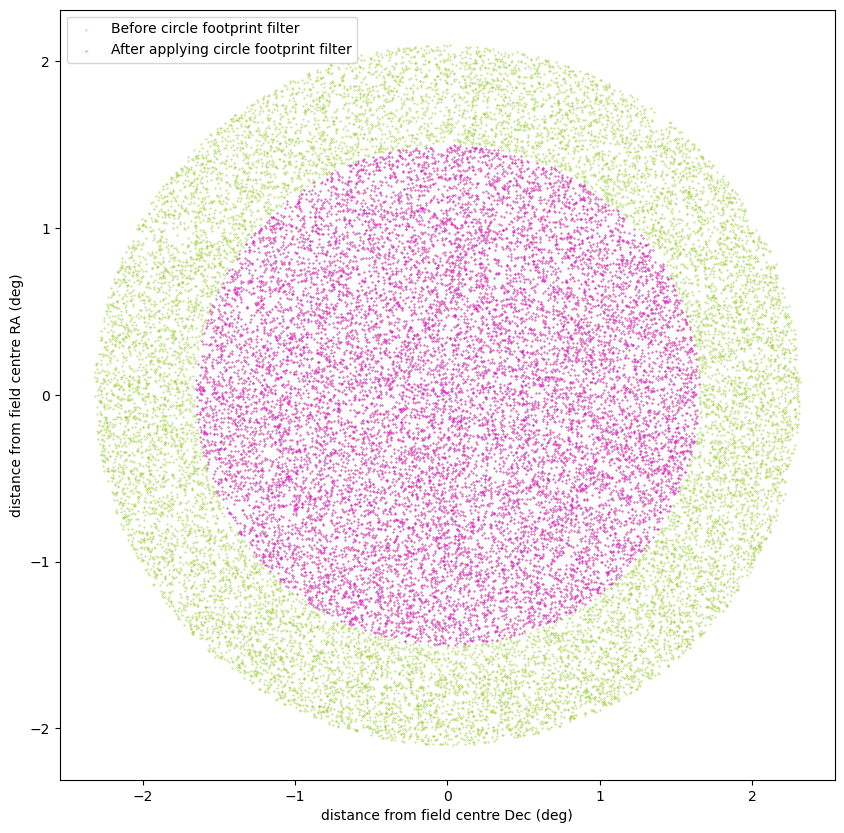

In [14]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.scatter(dfobs['fieldRA_deg']-dfobs['RA_deg'],dfobs['fieldDec_deg']-dfobs['Dec_deg'], s=0.1, color='YellowGreen', label='Before circle footprint filter')
ax.scatter(obs_new ['fieldRA_deg']-obs_new ['RA_deg'],obs_new ['fieldDec_deg']-obs_new ['Dec_deg'], s=0.1, color='magenta', label='After applying circle footprint filter')
ax.set_ylabel('distance from field centre RA (deg)')
ax.set_xlabel('distance from field centre Dec (deg)')
plt.legend()
plt.show()

In [15]:
object_sep_new = get_separation(obs_new['RA_deg'].values,
                            obs_new['Dec_deg'].values, 
                            obs_new['fieldRA_deg'].values,
                            obs_new['fieldDec_deg'].values)

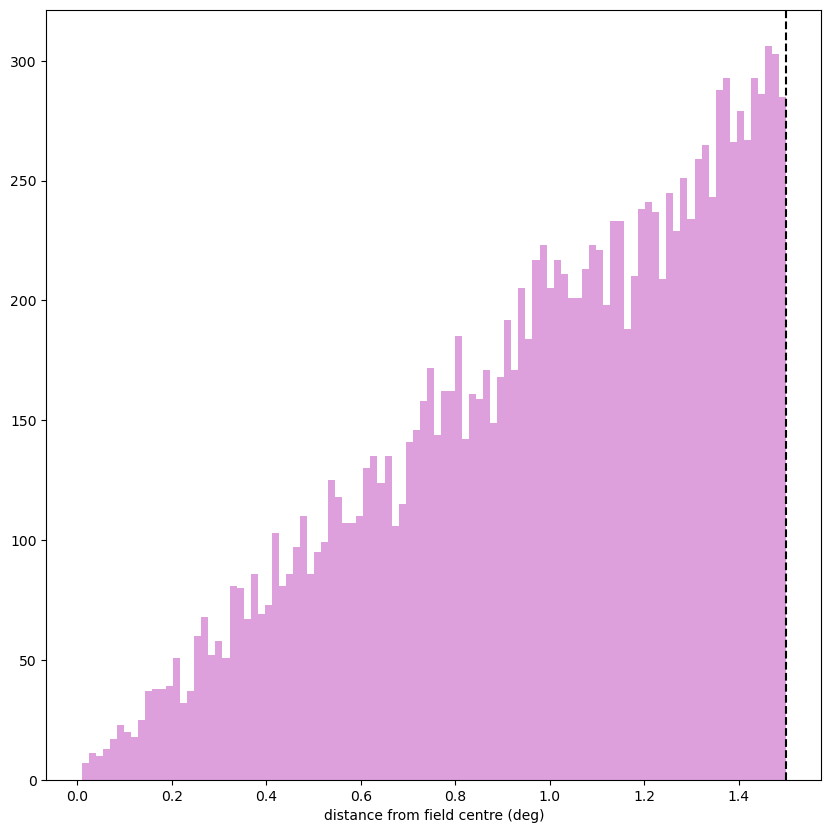

In [16]:
fig, ax = plt.subplots(1, figsize=(10,10))
_ = ax.hist(object_sep_new, 100, color='plum')
ax.axvline(1.5, color='black', linestyle='--')
ax.set_xlabel('distance from field centre (deg)')
plt.show()